In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
X = moons[0]
y = moons[1]

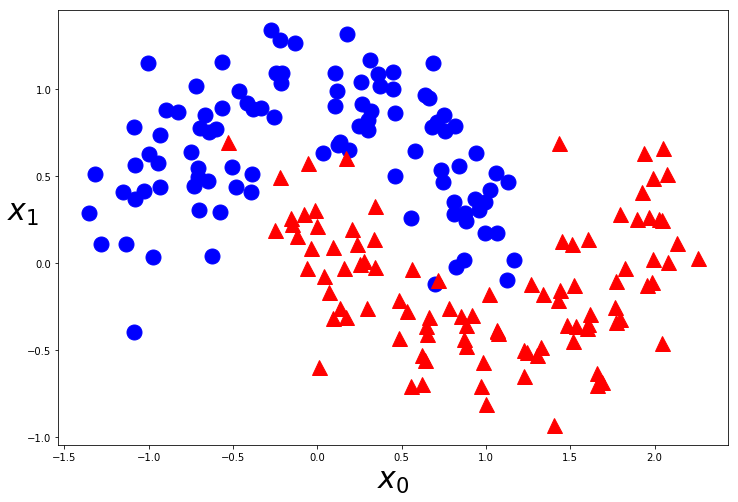

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, margin=0.3):
    _x1 = np.linspace(X[:, 0].min()-margin, X[:, 0].max()+margin, 100)
    _x2 = np.linspace(X[:, 1].min()-margin, X[:, 1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
def plot_datasets(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", ms=15) 
    plt.xlabel("$x_0$", fontsize=30)
    plt.ylabel("$x_1$", fontsize=30, rotation=0)
    
plt.figure(figsize=(12, 8))
plot_datasets(X, y)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

log_reg = LogisticRegression().fit(X_train, y_train)
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)

print(log_reg.score(X_test, y_test))
print(tree_clf.score(X_test, y_test))

0.84
0.98


In [6]:
from sklearn.model_selection import KFold, cross_val_score

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

log_reg_score = cross_val_score(log_reg, X, y, cv=kfold)
tree_clf_score = cross_val_score(tree_clf, X, y, cv=kfold)

print(log_reg_score)
print(tree_clf_score)

[0.85  0.875 0.875 0.825 0.775]
[0.925 0.925 0.95  0.95  0.9  ]


In [8]:
print(log_reg_score.mean())
print(tree_clf_score.mean())

0.8400000000000001
0.93


In [9]:
from sklearn.metrics import confusion_matrix

In [11]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree_clf = tree_clf.predict(X_test)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_tree_clf = confusion_matrix(y_test, y_pred_tree_clf)

print(cm_log_reg)
print("\n")
print(cm_tree_clf)

[[23  5]
 [ 3 19]]


[[28  0]
 [ 1 21]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
print("precision log_reg:\n", precision_score(y_test, y_pred_log_reg))
print("\n")
print("precision tree_clf:\n", precision_score(y_test, y_pred_tree_clf))

precision log_reg:
 0.7916666666666666


precision tree_clf:
 1.0


In [14]:
print("recall log_reg:\n", recall_score(y_test, y_pred_log_reg))
print("\n")
print("recall tree_clf:\n", recall_score(y_test, y_pred_tree_clf))

recall log_reg:
 0.8636363636363636


recall tree_clf:
 0.9545454545454546


In [15]:
print("f1 log_reg:\n", f1_score(y_test, y_pred_log_reg))
print("\n")
print("f1 tree_clf:\n", f1_score(y_test, y_pred_tree_clf))

f1 log_reg:
 0.8260869565217391


f1 tree_clf:
 0.9767441860465117


In [16]:
from sklearn.metrics import precision_recall_curve

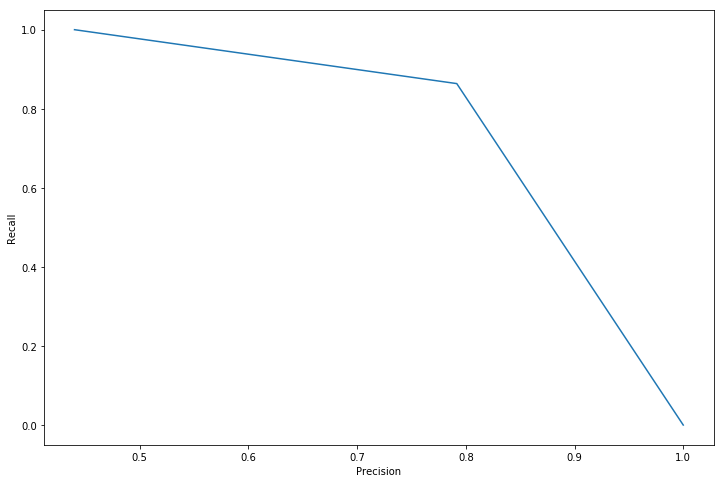

In [18]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_log_reg)

plt.figure(figsize=(12, 8))
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

In [19]:
from mglearn.datasets import make_wave

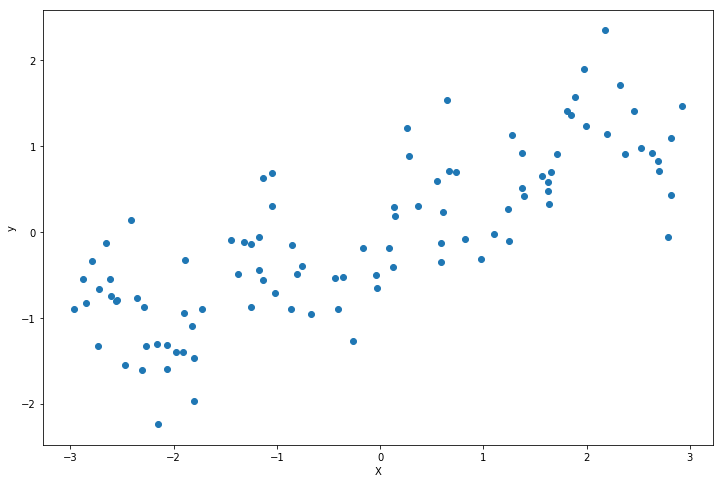

In [20]:
X, y = make_wave(n_samples=100)

plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

In [25]:
print(lin_reg.score(X_test, y_test))

0.621210114749764


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.3621150673476498

In [28]:
rmse = np.sqrt(mse)
rmse

0.6017599748634416